In [68]:
import numpy as np
from numpy.random import multivariate_normal
from numpy.random import randint
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal as mn

In [42]:
blue_means = multivariate_normal([1, 0], [[1, 0], [0, 1]], 10)
red_means = multivariate_normal([0, 1], [[1, 0], [0, 1]], 10)

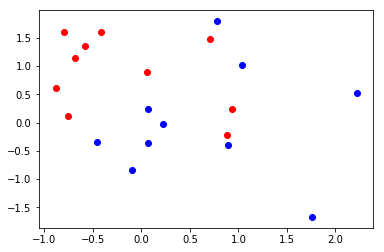

In [43]:
plt.scatter(blue_means[:, 0], blue_means[:,1],c='blue')
plt.scatter(red_means[:, 0], red_means[:,1],c='red')

In [44]:
blue = np.zeros(shape=(100, 2))
red = np.zeros(shape=(100, 2))
for i in range(100):
    blue_mean = blue_means[randint(0, len(blue_means))]
    red_mean = red_means[randint(0, len(red_means))]
    blue[i,:] = multivariate_normal(blue_mean, [[0.2, 0], [0, 0.2]], 1)
    red[i,:] = multivariate_normal(red_mean, [[0.2, 0], [0, 0.2]], 1)

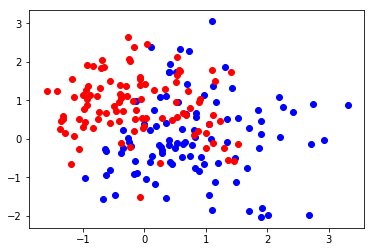

In [45]:
plt.scatter(blue[:, 0], blue[:,1],c='blue')
plt.scatter(red[:, 0], red[:,1],c='red')

In [58]:
x_min, y_min = np.min(np.stack([np.amin(blue, axis=0), np.amin(red, axis=0)]), axis=0)
x_max, y_max = np.max(np.stack([np.amax(blue, axis=0), np.amax(red, axis=0)]), axis=0)

In [59]:
(x_min, x_max), (y_min, y_max)

((-1.5920759798922277, 3.315931480202636),
 (-2.044378918924182, 3.069494432981717))

In [98]:
x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max, 0.01), 
                             np.arange(y_min, y_max, 0.01))
colors = np.zeros(shape=x_grid.shape)

In [99]:
for i in range(x_grid.shape[0]):
    for j in range(x_grid.shape[1]):
        x = x_grid[i, j]
        y = y_grid[i, j]
        p_blue = 0
        p_red = 0
        for k in range(10):
            p_blue += 0.1*mn(blue_means[k], [[0.2, 0], [0, 0.2]]).pdf([x, y])
            p_red += 0.1*mn(red_means[k], [[0.2, 0], [0, 0.2]]).pdf([x, y])
        colors[i, j] = int(p_blue > p_red)

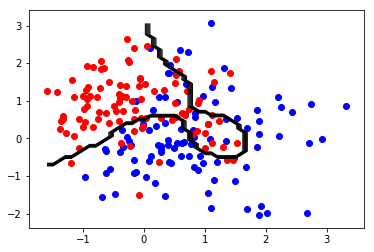

In [97]:
#plt.scatter(x_grid, y_grid, c=colors)
plt.contour(x_grid, y_grid, colors, colors='black', linewidths=1)
plt.scatter(blue[:, 0], blue[:,1],c='blue')
plt.scatter(red[:, 0], red[:,1],c='red')